# Exploring rhino data

Notebook by Albert

This notebook explores two rhino related datasets and draws links between the two. The datasets are 1) user-submitted spottings of rhinos, and 2) fossil findings. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import cartopy 
import cartopy.feature as cfeature

## iNaturalist dataset
The data has been extracted from iNaturalist, a dataset that contains records of over 47 million animal observations including over 2 million mammals, all spotted by app users since around 2000. The extracted dataset contains only spottings of the three main types of rhino that exist currently: black rhino, white rhino and indian rhino.

Each rhino observation has a unique ID, Key and reference link. The link takes us to the iNaturalist website - for example, the link for the first observation (http://www.inaturalist.org/observations/570700	) looks like this

![rhino_screenshot.png](rhino_screenshot.png)

In [2]:
# load the data
wr = pd.read_csv("white_rhinos.csv",sep='\t')
ir = pd.read_csv("indian_rhinos.csv",sep='\t')
br = pd.read_csv("black_rhinos.csv",sep='\t')

In [3]:
# show the first few rows using .head()
br.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,911491754,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/515204,Animalia,Chordata,Mammalia,Perissodactyla,Rhinocerotidae,Diceros,Diceros bicornis,...,Michal Sloviak,2024-02-28T18:18:15,CC_BY_NC_4_0,J. Allen Ratzlaff,J. Allen Ratzlaff,NaN,NaN,2024-07-09T16:13:32.099Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,911491666,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/509175,Animalia,Chordata,Mammalia,Perissodactyla,Rhinocerotidae,Diceros,Diceros bicornis,...,Michal Sloviak,2024-02-28T18:19:14,CC_BY_NC_4_0,J. Allen Ratzlaff,J. Allen Ratzlaff,NaN,NaN,2024-07-09T16:13:26.381Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,911491656,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/509200,Animalia,Chordata,Mammalia,Perissodactyla,Rhinocerotidae,Diceros,Diceros bicornis,...,J. Allen Ratzlaff,2014-01-24T18:36:57,CC_BY_NC_4_0,J. Allen Ratzlaff,J. Allen Ratzlaff,NaN,NaN,2024-07-09T16:50:49.159Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
3,899950465,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/574160,Animalia,Chordata,Mammalia,Perissodactyla,Rhinocerotidae,Diceros,Diceros bicornis,...,Tan Kok Hui,2017-09-10T08:42:49,CC_BY_NC_4_0,James Steamer,James Steamer,NaN,NaN,2024-07-09T16:50:52.558Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,899939682,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/241903,Animalia,Chordata,Mammalia,Perissodactyla,Rhinocerotidae,Diceros,Diceros bicornis,...,Tan Kok Hui,2017-03-12T09:53:26,CC_BY_NC_4_0,Carmelo López Abad,Carmelo López Abad,NaN,NaN,2024-07-09T16:51:18.309Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


Text(0, 0.5, 'number of rhinos spottings')

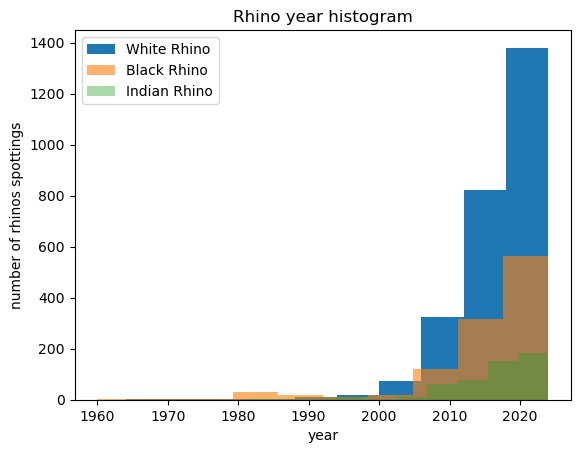

In [4]:
# histogram of spottings of the three rhinos (year), low number of bins
plt.hist(wr.year,label="White Rhino")
plt.hist(br.year,alpha=0.6,label="Black Rhino")
plt.hist(ir.year,alpha=0.4,label="Indian Rhino")
plt.title("Rhino year histogram")
plt.legend()
plt.xlabel("year")
plt.ylabel("number of rhinos spottings")

The histogram of observations shows an increase in number of observations with time - ANYTHING ELSE?

Text(0, 0.5, 'number of rhinos spottings')

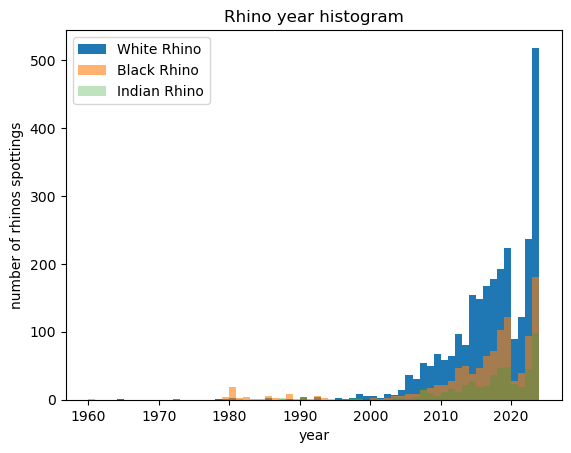

In [5]:
# histogram of spottings of the three rhinos (year), higher number of bins
plt.hist(wr.year,bins=max(wr.year)-min(wr.year),label="White Rhino")
plt.hist(br.year,bins=max(br.year)-min(br.year),alpha=0.6,label="Black Rhino")
plt.hist(ir.year,bins=max(ir.year)-min(ir.year),alpha=0.3,label="Indian Rhino")
plt.title("Rhino year histogram")
plt.legend()
plt.xlabel("year")
plt.ylabel("number of rhinos spottings")

In [6]:
# add here filter by year function
def filter_by_year(data, start_year, end_year):
    new_data = data[(data.year>start_year) & (data.year<end_year)]
    return new_data

We filter by year because 

Text(0, 0.5, 'number of rhinos spottings')

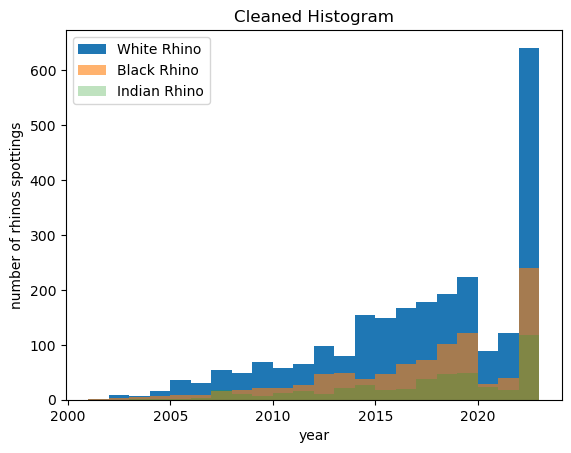

In [7]:
# re-plot the histogram, but with all the three datasets starting on the same year
wr2000=filter_by_year(wr,2000,2024)
br2000=filter_by_year(br,2000,2024)
ir2000=filter_by_year(ir,2000,2024)
plt.hist(wr2000.year,bins=max(wr2000.year)-min(wr2000.year),label="White Rhino")
plt.hist(br2000.year,bins=max(br2000.year)-min(br2000.year),alpha=0.6,label="Black Rhino")
plt.hist(ir2000.year,bins=max(ir2000.year)-min(ir2000.year),alpha=0.3,label="Indian Rhino")
plt.title("Cleaned Histogram")
plt.legend()
plt.xlabel("year")
plt.ylabel("number of rhinos spottings")

fixing the number of bins shows the effect of the pandemic. We could show if this was a significant drop by creating a regression model and testing if the data is different for that period

Text(0, 0.5, 'number of rhinos spottings')

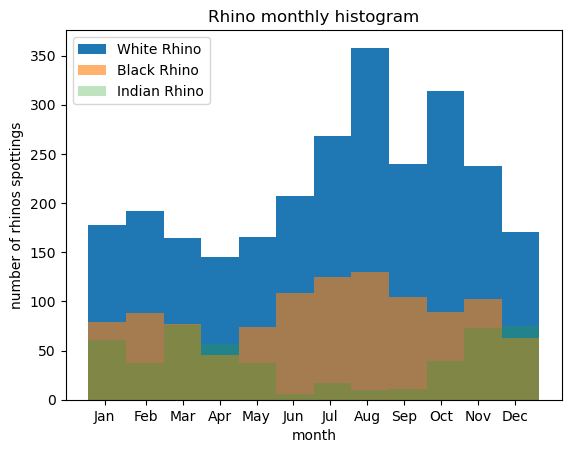

In [8]:
# histogram of spottings of the three rhinos (monthly)
plt.hist(wr.month,bins=12,label="White Rhino")
plt.hist(br.month,bins=12,alpha=0.6,label="Black Rhino")
plt.hist(ir.month,bins=12,alpha=0.3,label="Indian Rhino")
plt.title("Rhino monthly histogram")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ticks = [ 1.4,  2.4,  3.3,  4.2,  5.1,  6.0,  6.9,  7.8,  8.7, 9.6, 10.5, 11.4]
plt.xticks(ticks, months)
plt.legend()
plt.xlabel("month")
plt.ylabel("number of rhinos spottings")

WHAT CAN WE SAY ABOUT THE SEASONAL PATTERNS
The dips could be caused by the raining reasons. As nobody want to travel so their will be less observasions.
In India the wet season is june to september.
In Africa its spring or autumn.

In [9]:
seasons_africa = {1:"dry",2:"dry",3:"wet",4:"wet",5:"wet",6:"dry",7:"dry",8:"dry",9:"dry",10:"wet",11:"wet",12:"wet"}
seasons_india = {1:"dry",2:"dry",3:"dry",4:"dry",5:"dry",6:"wet",7:"wet",8:"wet",9:"wet",10:"dry",11:"dry",12:"dry"}

In [10]:
br["season"]=br.month.replace(seasons_africa)

null hypothesis: there is no difference in the number of spottings in the wet and dry seasons.
H1: There would be a difference in the wet seasons,

In [11]:
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

In [12]:
br.season.value_counts()

season
dry    635
wet    450
Name: count, dtype: int64

In [13]:
chisquare(br.season.value_counts())

Power_divergenceResult(statistic=31.543778801843317, pvalue=1.949940913030506e-08)

I choose a chisquare test as there is enough samples, the data is categorical(Dry, Wet). I choose this test to test the null hypothesis that there is the same frequency of observations in the dry and the wet seasons. We choose a threshold of 0.05(5%). I run the test for black rhinos and I get a p value below the threshold, So I reject the null hypothesis so there is a difference between wet and dry seasons

In [14]:
wr["season"]=wr.month.replace(seasons_africa)

In [15]:
chisquare(wr.season.value_counts())

Power_divergenceResult(statistic=22.922727272727272, pvalue=1.6864601940434262e-06)

In Africa the wet and dry seasons both lasts 6 month so we assume that both categories are equally likely. However in india a third is wet while two third of the year is dry. So we would expect our frequencies to follow the same distribution.

In [16]:
ir["season"]=ir.month.replace(seasons_india)

In [17]:
chisquare(ir.season.value_counts(),f_exp=[len(ir)*2/3, len(ir)*1/3])

Power_divergenceResult(statistic=134.95891783567134, pvalue=3.3707161517435004e-31)

The three tests show significant differences between wet and dry seasons for all three species.

We can also test if there is a difference in dry and wet seasonbetween black rhinos and white rhinos

In [18]:
br["species"]="black"
wr["species"]="white"

In [19]:
african_rhinos  = pd.concat([br[["season", "species"]], wr[["season", "species"]]])

In [20]:
african_rhinos

,season,species
0,wet,black
1,dry,black
2,dry,black
3,dry,black
4,wet,black
...,...,...
2635,wet,white
2636,wet,white
2637,wet,white
2638,dry,white


In [21]:
pd.crosstab(african_rhinos.season,african_rhinos.species)

species,black,white
season,,
dry,635,1443
wet,450,1197


In [22]:
chi2_contingency(pd.crosstab(african_rhinos.season,african_rhinos.species))

Chi2ContingencyResult(statistic=4.504739042104093, pvalue=0.033801053466528425, dof=1, expected_freq=array([[ 605.26979866, 1472.73020134],
       [ 479.73020134, 1167.26979866]]))

This P value is 0.03 so we reject the null hypothesis. however this p value could be considered not significant if we had choosen a lower threshold.

## Maps

Text(0.5, 1.0, 'spottings of Rhinos in Africa')

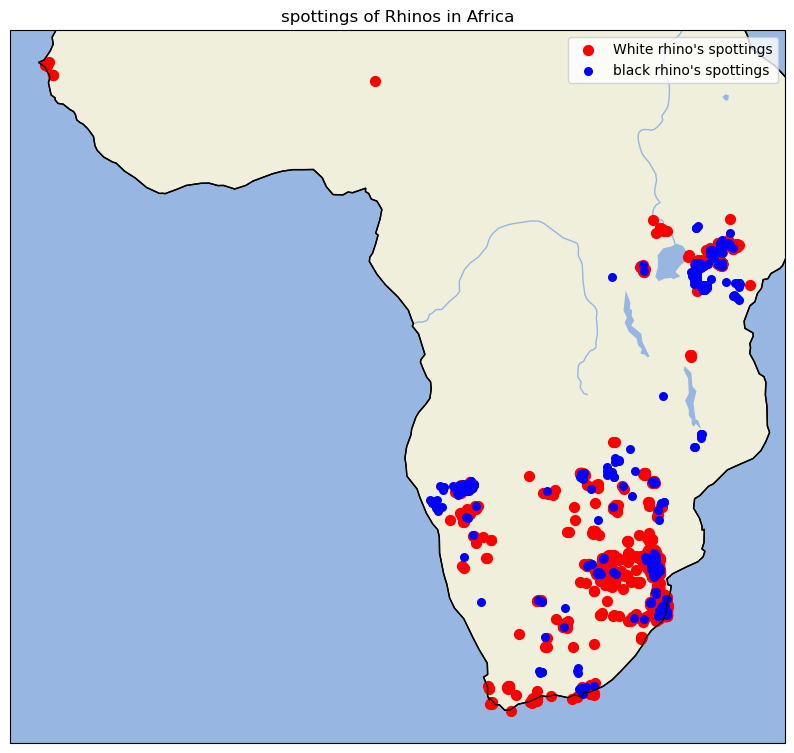

In [23]:
# plot here all the african observations
fig,ax = plt.subplots(1,1,figsize = (10,10), subplot_kw={'projection':cartopy.crs.Mercator()})
ax.coastlines()
plt.scatter(wr.decimalLongitude,wr.decimalLatitude,transform=cartopy.crs.PlateCarree(),s=50,c="red",label="White rhino's spottings")
plt.scatter(br.decimalLongitude,br.decimalLatitude,transform=cartopy.crs.PlateCarree(),s=30,c="blue",label="black rhino's spottings")
ax.legend()
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.RIVERS, zorder=0)
ax.set_title("spottings of Rhinos in Africa")

Text(0.5, 1.0, 'spottings of Rhinos in Africa \n 2020-2024')

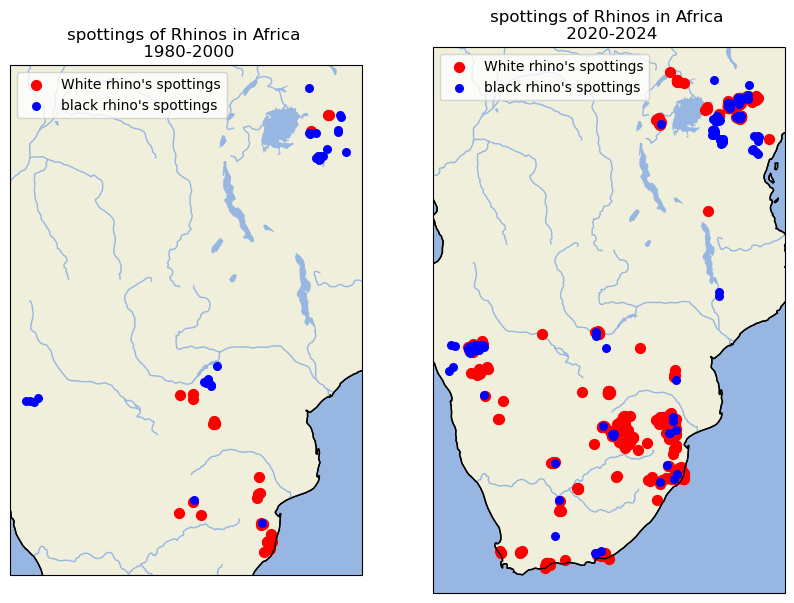

In [24]:
# plot here the side-by-side graphs with two periods of time, to compare
fig,ax = plt.subplots(1,2,figsize = (10,10), subplot_kw={'projection':cartopy.crs.Mercator()})
ax[0].coastlines()
ax[0].scatter(filter_by_year(wr,1980,2000).decimalLongitude,filter_by_year(wr,1980,2000).decimalLatitude,transform=cartopy.crs.PlateCarree(),s=50,c="red",label="White rhino's spottings")
ax[0].scatter(filter_by_year(br,1980,2000).decimalLongitude,filter_by_year(br,1980,2000).decimalLatitude,transform=cartopy.crs.PlateCarree(),s=30,c="blue",label="black rhino's spottings")
ax[0].legend()
ax[0].add_feature(cartopy.feature.OCEAN, zorder=0)
ax[0].add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax[0].add_feature(cartopy.feature.LAKES, zorder=0)
ax[0].add_feature(cartopy.feature.RIVERS, zorder=0)
ax[0].set_title("spottings of Rhinos in Africa \n 1980-2000")
ax[1].coastlines()
ax[1].scatter(filter_by_year(wr,2020,2024).decimalLongitude,filter_by_year(wr,2020,2024).decimalLatitude,transform=cartopy.crs.PlateCarree(),s=50,c="red",label="White rhino's spottings")
ax[1].scatter(filter_by_year(br,2020,2024).decimalLongitude,filter_by_year(br,2020,2024).decimalLatitude,transform=cartopy.crs.PlateCarree(),s=30,c="blue",label="black rhino's spottings")
ax[1].legend()
ax[1].add_feature(cartopy.feature.OCEAN, zorder=0)
ax[1].add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax[1].add_feature(cartopy.feature.LAKES, zorder=0)
ax[1].add_feature(cartopy.feature.RIVERS, zorder=0)
ax[1].set_title("spottings of Rhinos in Africa \n 2020-2024")

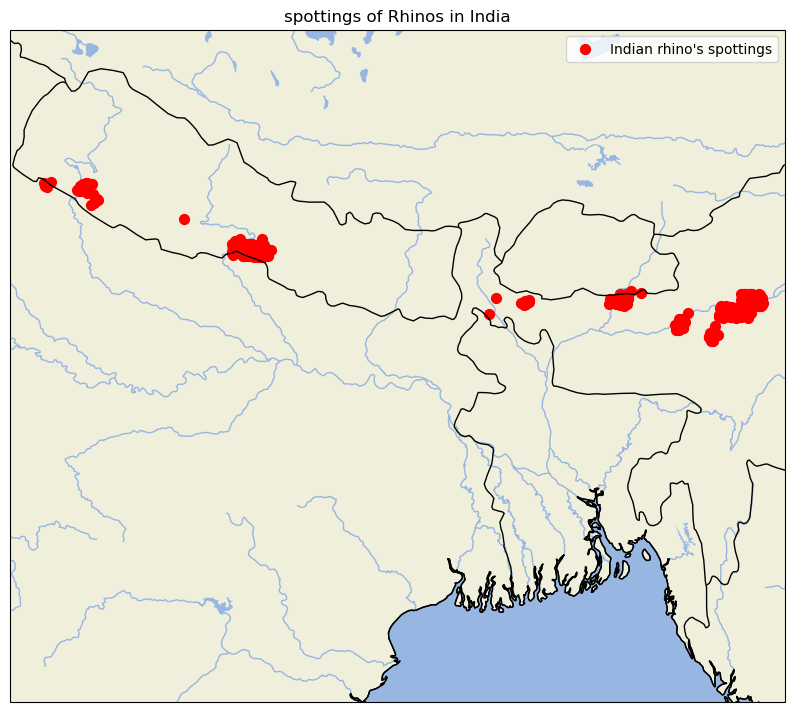

In [25]:
# plot here all the indian observations
fig,ax = plt.subplots(1,1,figsize = (10,10), subplot_kw={'projection':cartopy.crs.Mercator()})
ax.coastlines()
plt.scatter(ir.decimalLongitude,ir.decimalLatitude,transform=cartopy.crs.PlateCarree(),s=50,c="red",label="Indian rhino's spottings")
ax.legend()
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.RIVERS, zorder=0)
ax.set_title("spottings of Rhinos in India")
ax.set_extent([80,94, 20,31], crs=cartopy.crs.PlateCarree())
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

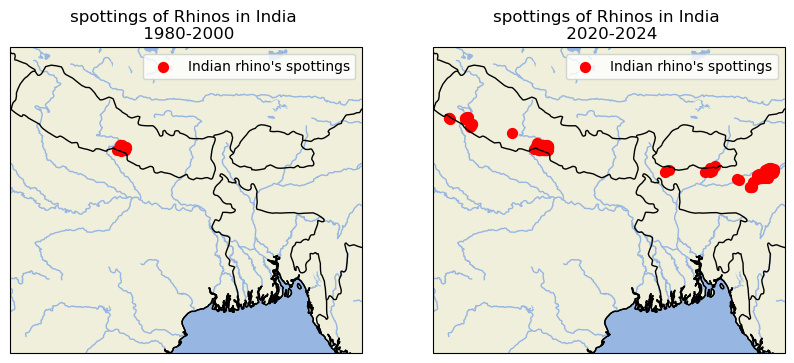

In [26]:
# plot here the side-by-side graphs with two periods of time, to compare
fig,ax = plt.subplots(1,2,figsize = (10,10), subplot_kw={'projection':cartopy.crs.Mercator()})
ax[0].coastlines()
ax[0].scatter(filter_by_year(ir,1980,2000).decimalLongitude,filter_by_year(ir,1980,2000).decimalLatitude,transform=cartopy.crs.PlateCarree(),s=50,c="red",label="Indian rhino's spottings")
ax[0].legend()
ax[0].add_feature(cartopy.feature.OCEAN, zorder=0)
ax[0].add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax[0].add_feature(cartopy.feature.LAKES, zorder=0)
ax[0].add_feature(cartopy.feature.RIVERS, zorder=0)
ax[0].set_title("spottings of Rhinos in India \n 1980-2000")
ax[0].set_extent([80,94, 20,31], crs=cartopy.crs.PlateCarree())
ax[0].add_feature(cfeature.BORDERS.with_scale('50m'))
ax[1].coastlines()
ax[1].scatter(filter_by_year(ir,2020,2024).decimalLongitude,filter_by_year(ir,2020,2024).decimalLatitude,transform=cartopy.crs.PlateCarree(),s=50,c="red",label="Indian rhino's spottings")
ax[1].legend()
ax[1].add_feature(cartopy.feature.OCEAN, zorder=0)
ax[1].add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax[1].add_feature(cartopy.feature.LAKES, zorder=0)
ax[1].add_feature(cartopy.feature.RIVERS, zorder=0)
ax[1].set_title("spottings of Rhinos in India \n 2020-2024")
ax[1].set_extent([80,94, 20,31], crs=cartopy.crs.PlateCarree())
ax[1].add_feature(cfeature.BORDERS.with_scale('50m'))

## Paelobio Database

The Paleobioloigy database has information on fossil findings around the world. The dataset here has been filtered to only show fossils from the rhinocerotoidea family, which includes the three types of rhinos that still exist today.

In [27]:
# load the data and show the first few rows using .head()
ff = pd.read_csv("pbdb_data.csv")

The column "max_ma" and "min_ma" show the maximum and minimum age of that fossil in millions of years. A new column called uncertainty contains the difference between the two dates.

In [28]:
# create the new column called uncertainty
ff["uncertainty"]=ff.max_ma-ff.min_ma

Text(0, 0.5, 'number of fossils')

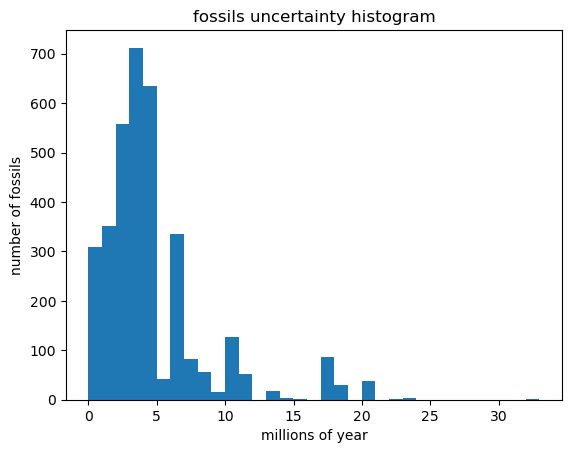

In [30]:
# plot the histogram of uncertainty
plt.hist(ff.uncertainty,bins=33)
plt.title("fossils uncertainty histogram")
plt.xlabel("millions of year")
plt.ylabel("number of fossils")

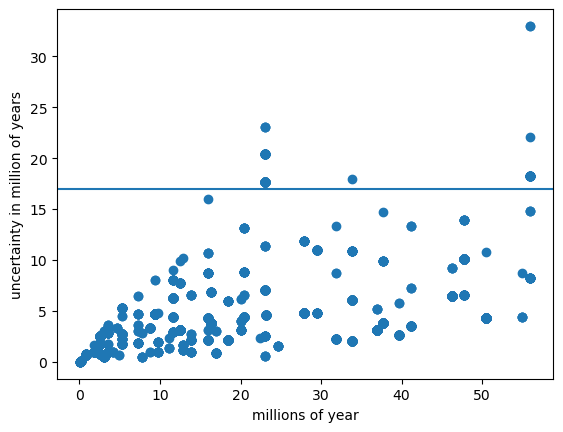

In [32]:
# plot the scatterplot of uncertainty vs age
plt.scatter(ff.max_ma,ff.uncertainty)
plt.xlabel("millions of year")
plt.ylabel("uncertainty in million of years")
plt.axhline(17)

Some samples have extremely high uncertainty, above 30 million years. Uncertainty is higher for older fossils. We remove all samples with high uncertainty.

In [33]:
# filter here
fffil=ff[ff.uncertainty<17]

The "early_interval" column contain the geological period where the fossil was found. However there are too many categories for this to be useful.

early_interval
Barstovian            189
Clarendonian          162
Bridgerian            128
Chadronian            124
Middle Pleistocene    113
Hemphillian           112
Middle Eocene         109
Early Pleistocene     101
Late Eocene            97
Late Oligocene         93
Uintan                 93
Late Miocene           92
Burdigalian            87
Pliocene               86
Piacenzian             84
Pleistocene            83
Gelasian               79
Orellan                74
Hemingfordian          73
Langhian               65
Name: count, dtype: int64

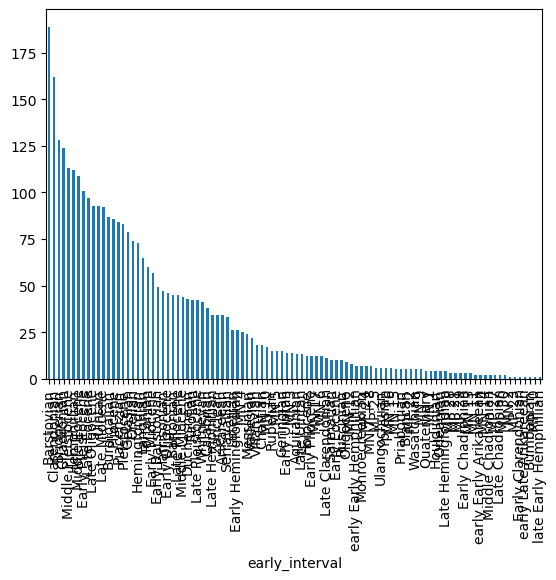

In [34]:
fffil.early_interval.value_counts().plot(kind='bar')
fffil.early_interval.value_counts().head(20)

Some of the categories are broader than others, e.g. the Calabrian age is part of the Pleistocene.

![quaternary_period.png](quaternary_period.png)

We can use a dictionary to replace the categories by broader ones so we can understand the data better. 
https://timescalefoundation.org/resources/geowhen/geolist.html

In [35]:
# put here the dictionary with the replacing categories
epochnames = {'Middle Eocene':"Eocene", 'Tortonian':"Miocene", 'Late Miocene':"Miocene", 'Middle Pleistocene':'Pleistocene',
       'Middle Miocene':"Miocene", 'Pleistocene':'Pleistocene', 'Early Pleistocene':'Pleistocene', 'Quaternary':"Quaternary",
       'Late Eocene':"Eocene", 'Lutetian':"Eocene", 'Wasatchian':"Eocene", 'Bridgerian':"Eocene", 'Uintan':"Eocene",
       'Duchesnean':"Eocene", 'Early Uintan':"Eocene", 'Late Uintan':"Eocene", 'Chadronian':"Eocene",
       'Early Chadronian':"Eocene", 'Middle Chadronian':"Eocene", 'Late Chadronian':"Eocene",
       'Orellan':"Oligocene", 'Whitneyan':"Oligocene", 'Arikareean':"Miocene", 'Harrisonian':"Oligocene", 'Geringian':"Oligocene",
       'Monroecreekian':"Oligocene", 'Chattian':"Oligocene", 'Early Hemingfordian':"Miocene",
       'Hemingfordian':"Miocene", 'Barstovian':"Miocene", 'Hemphillian':"Miocene", 'Miocene':"Miocene",
       'Clarendonian':"Miocene", 'Late Clarendonian':"Miocene", 'Late Hemphillian':"Pliocene",
       'Burdigalian':"Miocene", 'Early Barstovian':"Miocene", 'early Early Hemphillian':"Miocene",
       'late Early Hemphillian':"Miocene", 'Langhian':"Miocene", 'Aquitanian':"Miocene", 'Blancan':"Pliocene",
       'Messinian':"Miocene", 'Zanclean':"Pliocene", 'Holocene':'Holocene', 'Piacenzian':"Pliocene", 'Calabrian':'Pleistocene',
       'Serravallian':"Miocene", 'Early Pliocene':"Pliocene", 'Late Pliocene':"Pliocene", 'Pliocene':"Pliocene",
       'Gelasian':"Pliocene", 'MN 9':"Miocene", 'Late Pleistocene':'Pleistocene', 'Early Miocene':"Miocene",
       'Arshantan':"Eocene", 'Ypresian':"Eocene", 'Bartonian':"Eocene", 'MN 5':"Miocene", 'MN 17':"Pliocene", 'Ruscinian':"Pliocene",
       'Turolian':"Miocene", 'Villanyian':"Pliocene", 'Neogene':'Neogene', 'Early Oligocene':"Oligocene", 'Rupelian':"Oligocene",
       'Orleanian':"Miocene", 'MN 6':"Miocene", 'MN 10':"Miocene", 'Vallesian':"Miocene", 'Sharamurunian':"Eocene",
       'MP 10':"Eocene", 'Late Oligocene':"Oligocene", 'Eocene':"Eocene", 'MN 15':"Pliocene", 'Early Eocene':"Eocene",
       'MN 7 + 8':"Miocene", 'MN 16':"Pliocene", 'MN 13':"Miocene", 'MN 14':"Pliocene", 'MN 12':"Miocene", 'MP 22':"Oligocene", 'MN 4':"Miocene",
       'MN 1':"Miocene", 'Houldjinian':"Eocene", 'Sarmatian':"Miocene", 'MN 3':"Miocene", 'MP 23':"Oligocene", 'MN 11':"Miocene",
       'MN 2':"Miocene", 'Irdinmanhan':"Eocene", 'MP 21':"Oligocene", 'Oligocene':"Oligocene",
       'early Early Arikareean':"Oligocene", 'Late Hemingfordian':"Miocene",
       'Early Clarendonian':"Miocene", 'early Late Arikareean':"Miocene", 'Ulangochuian':"Eocene",
       'Bumbanian':"Eocene", 'MP 24':"Oligocene", 'MP 28':"Oligocene", 'MP 29':"Oligocene", 'MP 27':"Oligocene", 'Priabonian':"Eocene",
       'MP 25':"Oligocene", 'MP 30':"Oligocene"}

In [36]:
fffil.early_interval.unique()

array(['Middle Eocene', 'Tortonian', 'Late Miocene', 'Middle Pleistocene',
       'Middle Miocene', 'Pleistocene', 'Early Pleistocene', 'Quaternary',
       'Late Eocene', 'Lutetian', 'Wasatchian', 'Bridgerian', 'Uintan',
       'Duchesnean', 'Early Uintan', 'Late Uintan', 'Chadronian',
       'Early Chadronian', 'Middle Chadronian', 'Late Chadronian',
       'Orellan', 'Whitneyan', 'Arikareean', 'Harrisonian', 'Geringian',
       'Monroecreekian', 'Chattian', 'Early Hemingfordian',
       'Hemingfordian', 'Barstovian', 'Hemphillian', 'Clarendonian',
       'Late Clarendonian', 'Late Hemphillian', 'Burdigalian',
       'Early Barstovian', 'early Early Hemphillian',
       'late Early Hemphillian', 'Langhian', 'Aquitanian', 'Blancan',
       'Messinian', 'Zanclean', 'Holocene', 'Piacenzian', 'Calabrian',
       'Serravallian', 'Early Pliocene', 'Late Pliocene', 'Pliocene',
       'Gelasian', 'MN 9', 'Late Pleistocene', 'Early Miocene',
       'Ypresian', 'Bartonian', 'MN 5', 'MN 17', 'R

In [37]:
# create a new column on the dataset that contains the replaced categories
fffil["epoch"]=fffil.early_interval.replace(epochnames)

/var/folders/yx/70jdvw4d1kq_kbfcc3f1bc200000gn/T/ipykernel_4893/3228481230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fffil["epoch"]=fffil.early_interval.replace(epochnames)


epoch
Miocene        1336
Eocene          737
Pliocene        432
Oligocene       399
Pleistocene     377
Holocene         12
Quaternary        4
Name: count, dtype: int64

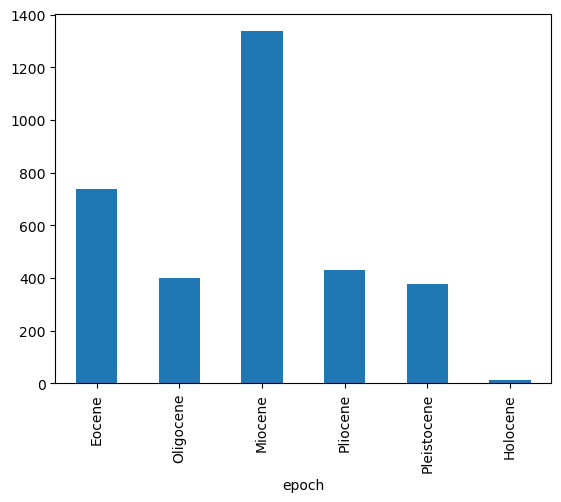

In [38]:
# run these again:
fffil.epoch.value_counts()[["Eocene","Oligocene","Miocene","Pliocene","Pleistocene","Holocene"]].plot(kind='bar')
fffil.epoch.value_counts()

In the dataset there are also many different species of rhinos, extinct and alive.

In [39]:
# show here the list of unique rhino species in the dataset
fffil.genus.value_counts().head(30)

genus
Teleoceras           318
Stephanorhinus       224
Ceratotherium        214
Hyrachyus            185
Aphelops             178
Hyracodon            109
Rhinoceros           104
Diceratherium         97
Aceratherium          92
Diceros               89
Brachypotherium       77
Dicerorhinus          75
Peraceras             71
Amynodon              62
Dihoplus              59
Subhyracodon          59
Menoceras             53
Chilotherium          49
Cadurcodon            39
Paraceratherium       38
Triplopus             38
Coelodonta            37
Ronzotherium          32
Trigonias             31
Metamynodon           23
Aprotodon             22
Paramynodon           22
Plesiaceratherium     21
Protaceratherium      18
Amynodontopsis        18
Name: count, dtype: int64

![rhino_screenshot_tree.png](rhino_screenshot_tree.png)

Source: https://en.wikipedia.org/wiki/Rhinoceros

We filter the dataset to show only the three species of rhino still alive today

In [40]:
# filter here to include only the three rhinos
ffproj=fffil[fffil.genus.isin(["Rhinoceros", "Ceratotherium", "Diceros"])]
ffprojex=fffil[fffil.genus.isin(["Dicerorhinus","Aceratherium","Brachypotherium"])]
ffprojAex=fffil[fffil.genus.isin(["Teleoceras", "Aphelops"])]

In [41]:
# show the table of periods vs species
pd.crosstab(ffproj.genus,ffproj.epoch)[["Oligocene","Miocene","Pliocene","Pleistocene","Holocene"]]


epoch,Oligocene,Miocene,Pliocene,Pleistocene,Holocene
genus,,,,,
Ceratotherium,0,23,134,55,2
Diceros,0,17,46,23,3
Rhinoceros,1,25,23,54,1


Text(0.5, 1.0, 'fossils of rhinos')

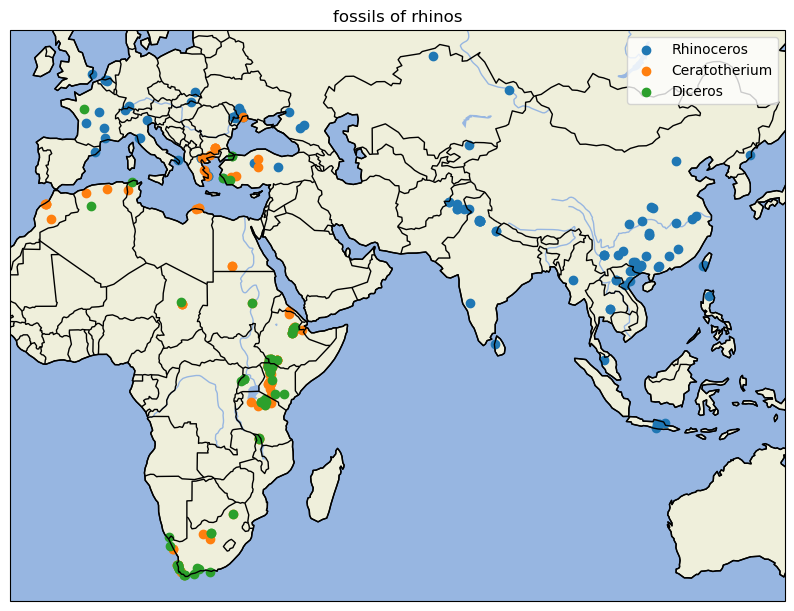

In [42]:
fig, ax = plt.subplots(1,1,figsize = (10,10), subplot_kw={'projection':cartopy.crs.Mercator()})
#ax.set_extent([80,94, 20,31], crs=cartopy.crs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS.with_scale('110m'))
for sp in pd.unique(ffproj.genus):
    ax.scatter(ffproj.lng[ffproj.genus==sp], ffproj.lat[ffproj.genus==sp], transform=cartopy.crs.PlateCarree(), label=sp) 
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.RIVERS, zorder=0)
ax.legend()
ax.set_title("fossils of rhinos")

Text(0.5, 1.0, 'histogram of rhino fossils by year of publication')

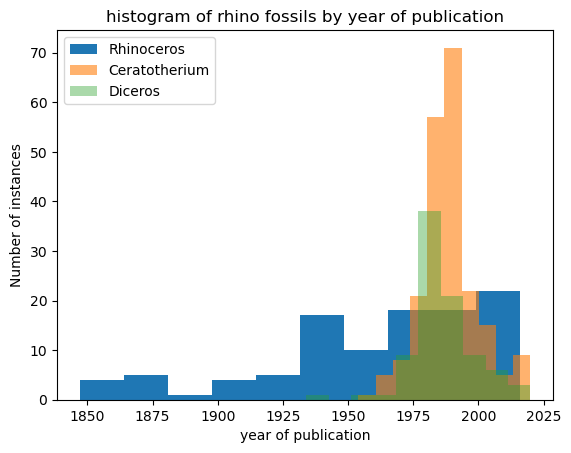

In [43]:
# plot here the three overlapping histograms of the publication date for that particular fossil finding 
plt.hist(ffproj[ffproj.genus=="Rhinoceros"].ref_pubyr,label="Rhinoceros")
plt.hist(ffproj[ffproj.genus=="Ceratotherium"].ref_pubyr,alpha=0.6,label="Ceratotherium")
plt.hist(ffproj[ffproj.genus=="Diceros"].ref_pubyr,alpha=0.4,label="Diceros")
plt.xlabel("year of publication")
plt.ylabel("Number of instances")
plt.legend()
plt.title("histogram of rhino fossils by year of publication") 

There could be research bias as the places in asia and europ have more people.

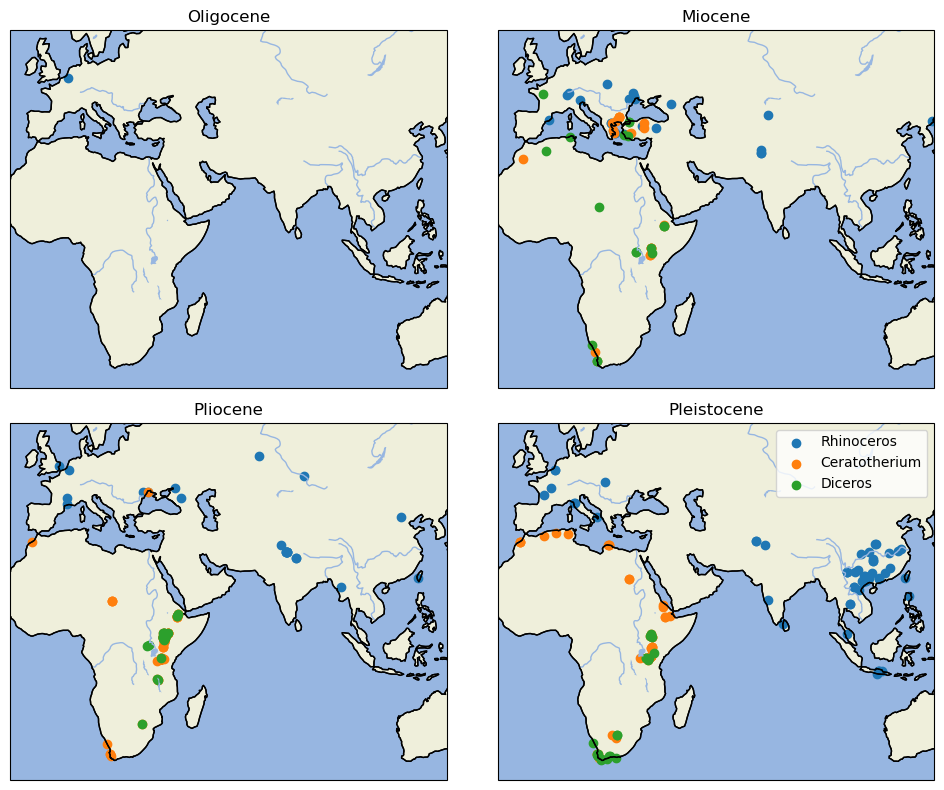

In [44]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (10,8), subplot_kw={'projection':cartopy.crs.Mercator()})
#
for epoch, axis in zip(["Oligocene", "Miocene", "Pliocene","Pleistocene"], ax.flatten()):
    for sp in pd.unique(ffproj.genus):
        cut_dataset = ffproj[(ffproj.epoch==epoch) & (ffproj.genus==sp)]
        axis.scatter(cut_dataset.lng, cut_dataset.lat, transform=cartopy.crs.PlateCarree(), label=sp) 
    axis.set_title(epoch)
    axis.coastlines()
    #axis.add_feature(cfeature.BORDERS.with_scale('110m'))
    axis.set_extent([-15,130, -40,60], crs=cartopy.crs.PlateCarree())
    axis.add_feature(cfeature.LAND)
    axis.add_feature(cfeature.OCEAN)
    axis.add_feature(cfeature.LAKES)
    axis.add_feature(cfeature.RIVERS)
    axis.add_feature(cfeature.COASTLINE)
#axis.legend()
axis.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

In [45]:
pd.crosstab(ffprojex.genus,ffprojex.epoch)#[["Oligocene","Miocene","Pliocene","Pleistocene","Holocene"]]

epoch,Miocene,Oligocene,Pleistocene,Pliocene,Quaternary
genus,,,,,
Aceratherium,85,6,0,1,0
Brachypotherium,74,2,0,1,0
Dicerorhinus,43,1,14,16,1


In [46]:
def plotmap(dataset):
    fig, ax = plt.subplots(1,1,figsize = (10,10), subplot_kw={'projection':cartopy.crs.Mercator()})
    #ax.set_extent([80,94, 20,31], crs=cartopy.crs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS.with_scale('110m'))
    for sp in pd.unique(dataset.genus):
        ax.scatter(dataset.lng[dataset.genus==sp], dataset.lat[dataset.genus==sp], transform=cartopy.crs.PlateCarree(), label=sp) 
    ax.add_feature(cartopy.feature.OCEAN, zorder=0)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
    ax.add_feature(cartopy.feature.LAKES, zorder=0)
    ax.add_feature(cartopy.feature.RIVERS, zorder=0)
    ax.legend()
    ax.set_title("fossils of rhinos")
    

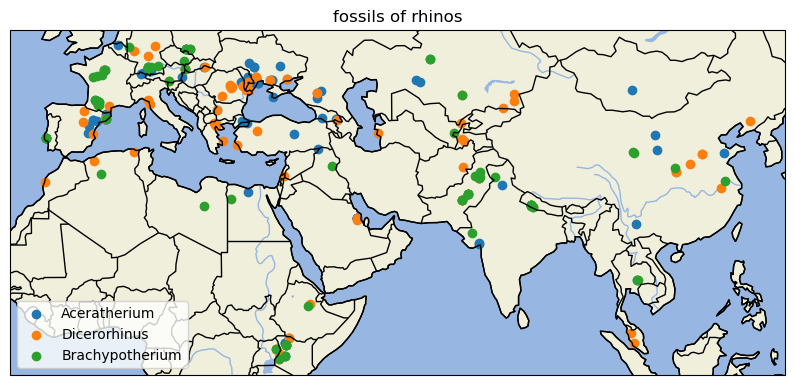

In [47]:
plotmap(ffprojex)

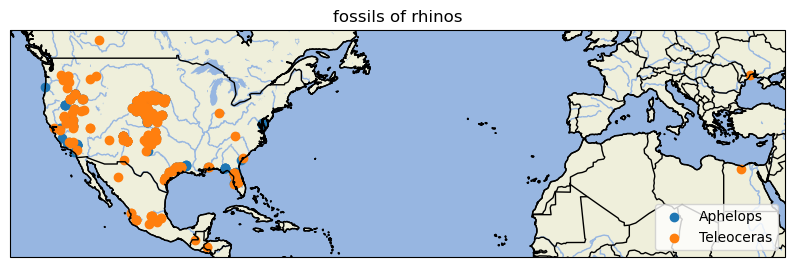

In [48]:
plotmap(ffprojAex)

In [49]:
def plot_timemap(dataset, region="EuropeAsiaAfrica", eras=["Oligocene", "Miocene", "Pliocene","Pleistocene"]):
    fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (10,8), subplot_kw={'projection':cartopy.crs.Mercator()})
    for epoch, axis in zip(["Oligocene", "Miocene", "Pliocene","Pleistocene"], ax.flatten()):
        for sp in pd.unique(dataset.genus):
            cut_dataset = dataset[(dataset.epoch==epoch) & (dataset.genus==sp)]
            axis.scatter(cut_dataset.lng, cut_dataset.lat, transform=cartopy.crs.PlateCarree(), label=sp) 
        axis.set_title(epoch)
        axis.coastlines()
        #axis.add_feature(cfeature.BORDERS.with_scale('110m'))
        if region=="EuropeAsiaAfrica":
            axis.set_extent([-15,130, -40,60], crs=cartopy.crs.PlateCarree())
        if region=="Europe":
            axis.set_extent([-20,50, 25,60], crs=cartopy.crs.PlateCarree())
        if region=="Africa":
            axis.set_extent([-20,70, -40,40], crs=cartopy.crs.PlateCarree())
        if region=="America":
            axis.set_extent([-150,-10, 0,60], crs=cartopy.crs.PlateCarree())
        if region=="world":
            axis.set_extent([-150,130, -40,60], crs=cartopy.crs.PlateCarree())
        axis.add_feature(cfeature.LAND)
        axis.add_feature(cfeature.OCEAN)
        axis.add_feature(cfeature.LAKES)
        axis.add_feature(cfeature.RIVERS)
        axis.add_feature(cfeature.COASTLINE)
    #axis.legend()
    axis.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()

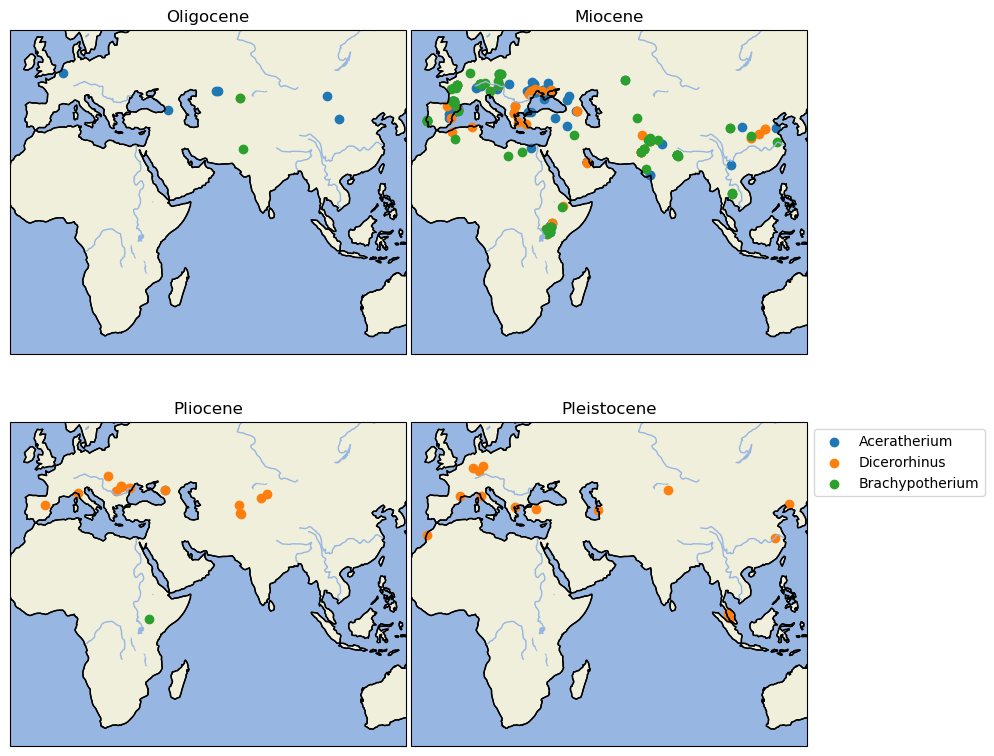

In [50]:
plot_timemap(ffprojex)

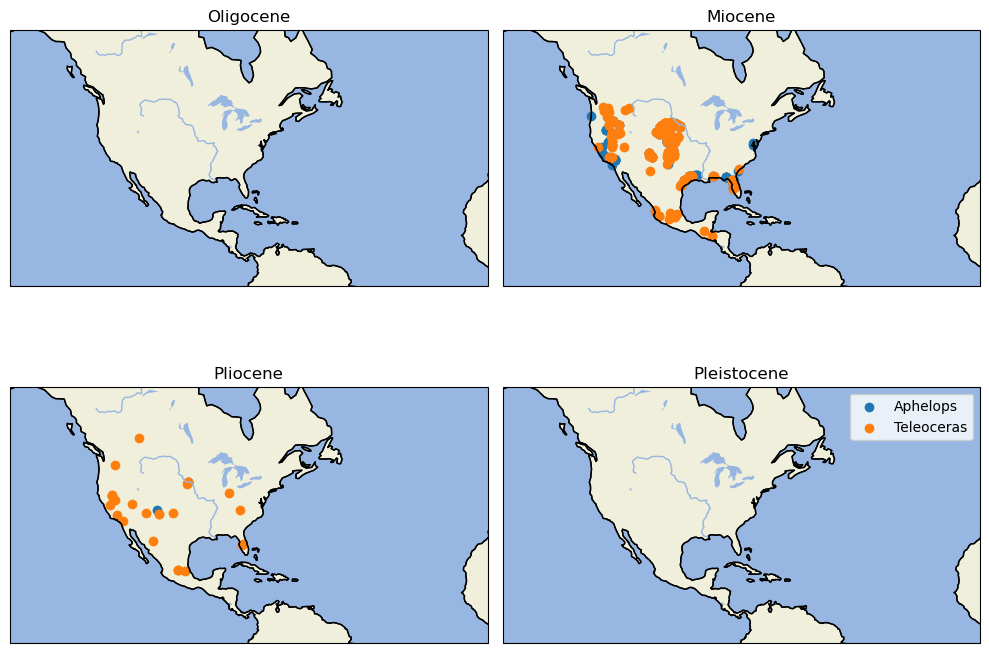

In [51]:
plot_timemap(ffprojAex,region="America")